1. housing data를 이용해 다음 과정을 실시하시오.
    - 데이터 로딩
    - 데이터 컬럼 확인
    - LSTAT, INDUS, NOX, RM, MEDV의 상호 상관그래프를 출력하고 heatmap으로도 출력
    - X = RM: 방의 갯수, y = MEDV: 집값
    - 데이터 분산도(산포도?)를 출력
    - train data와 test데이터로 분리 (train_test_split 사용)
    - Linear Regression / Lasso / Ridge / elastic Net 방식으로 선형회귀 분석을 실시한 다음 계수를 출력하고 비교 그래프 출력
    - 선형 회귀선을 출력
    - Ridge 회귀 분석에서 적절한 alpha값을 결정
    - 각 분석방법에 대하여 r2_score로 평가하고 mean_squared_error를 이용하여 MSE값을 출력


# <font color='orange'/>데이터 로딩, 데이터 컬럼 확인

In [ ]:
import pandas as pd
pd.DataFrame(boston.data, columns=boston.feature_names)

In [2]:
from sklearn import datasets

In [5]:
boston = datasets.load_boston()

In [31]:
bost = pd.DataFrame(boston.data, columns=boston.feature_names)

In [38]:
boston.DESCR.split('\n')

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [95]:
bosto = pd.read_table('housing.data', header=None, delimiter='\s+')

In [97]:
bosto.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [98]:
cols = pd.Series(boston.feature_names)
cols = cols.append(pd.Series('MEDV'))
cols

0        CRIM
1          ZN
2       INDUS
3        CHAS
4         NOX
5          RM
6         AGE
7         DIS
8         RAD
9         TAX
10    PTRATIO
11          B
12      LSTAT
0        MEDV
dtype: object

In [104]:
bosto.columns = cols

In [106]:
bosto.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# <font color='orange'> LSTAT, INDUS, NOX, RM, MEDV의 상호 상관그래프를 출력하고 heatmap으로도 출력

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
bost1 = pd.DataFrame([bosto.LSTAT, bosto.INDUS, bosto.NOX, bosto.RM, bosto.MEDV], index=['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV'])

In [137]:
bost1 = bost1.T

In [138]:
bost1[:6]

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2
5,5.21,2.18,0.458,6.430,28.7


In [139]:
bost1.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


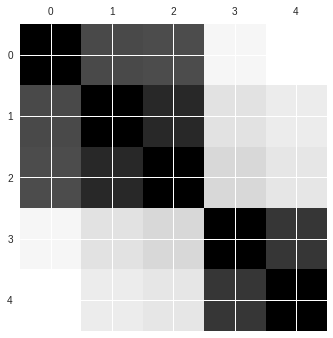

In [140]:
plt.matshow(bost1.corr())

In [114]:
import seaborn as sns

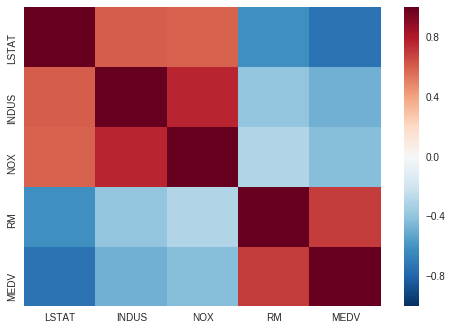

In [141]:
sns.heatmap(bost1.corr(), xticklabels=bost1.columns, yticklabels=bost1.columns)

# <font color='orange'> X = RM: 방의 갯수, y = MEDV: 집값
# <font color='orange'> 데이터 분산도(산포도?)를 출력

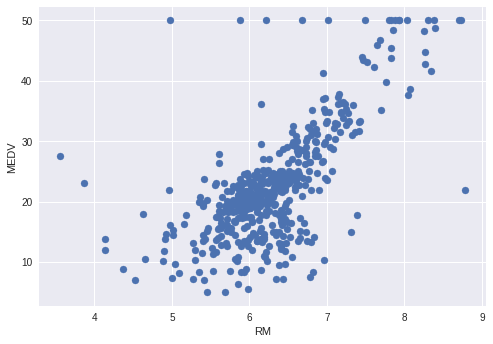

In [146]:
plt.scatter(bosto.RM, bosto.MEDV)
plt.xlabel('RM')
plt.ylabel('MEDV')

# <font color='orange'> train data와 test데이터로 분리 (train_test_split 사용)

# <font color='orange'>  Linear Regression / Lasso / Ridge / elastic Net 방식으로 선형회귀 분석을 실시한 다음 계수를 출력하고 비교 그래프 출력

# <font color='orange'>  선형 회귀선을 출력

# <font color='orange'> Ridge 회귀 분석에서 적절한 alpha값을 결정

# <font color='orange'> 각 분석방법에 대하여 r2_score로 평가하고 mean_squared_error를 이용하여 MSE값을 출력

In [ ]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(y)

# 모델 평가
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print 'MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred))

print 'R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred))

from sklearn import linear_model
alphas = np.linspace(0, 20)
reg = linear_model.RidgeCV(alphas=alphas, store_cv_values=True, gcv_mode='eigen').fit(X_train, y_train)

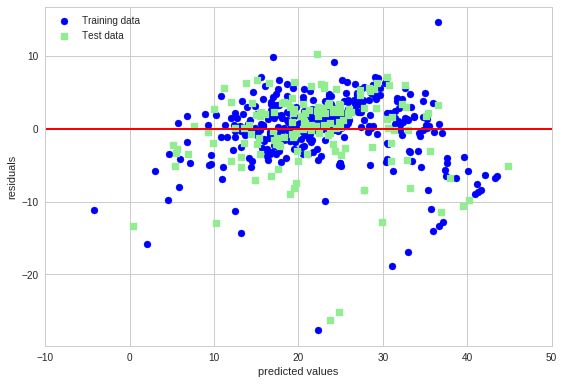

In [153]:
from sklearn.cross_validation import train_test_split
X = bosto.iloc[:, :-1].values
y = bosto['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
plt.scatter(y_train_pred, y_train_pred - y_train,
           c='blue', marker='o', label='Training data')

plt.scatter(y_test_pred, y_test_pred - y_test,
           c='lightgreen', marker='s', label='Test data')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

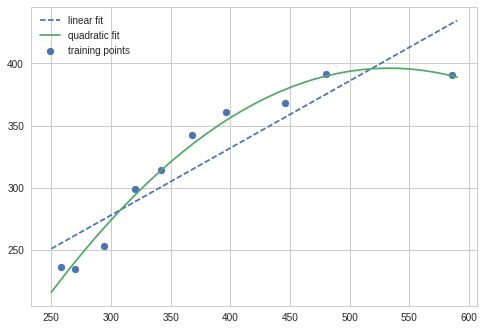

In [156]:
# 보간 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = np.array([258.0, 270.0, 294.0, 320.0, 
              342.0, 368.0, 396.0, 446.0, 
              480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 298.6, 
              314.2, 342.2, 360.8, 368.0, 
              391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

